In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [253]:
final = pd.read_csv('Final_Data.csv')

### Filtering

In [254]:
final.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty', 'encounter_id',
       'race', 'gender', 'age', 'weight', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [255]:
final['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [256]:
final[final['admission_type_id']==4][['patient_nbr','age','diabetesMed']]

,patient_nbr,age,diabetesMed
2043,20191257,[50-60),Yes
2203,59902119,[80-90),Yes
2461,21564738,[70-80),Yes
4823,20593143,[60-70),Yes
35877,2177469,[60-70),Yes
47548,58776723,[40-50),No
48711,217206,[70-80),Yes
80354,20103048,[0-10),No
87714,33119388,[60-70),Yes
100721,115019244,[80-90),Yes


In [257]:
ama=final[final['discharge_disposition_id']==7]

In [258]:
ama[ama['patient_nbr']==88785891]['discharge_disposition_id']

50773     7
72068     7
82693     7
101385    7
Name: discharge_disposition_id, dtype: int64

In [259]:
ama['patient_nbr'].value_counts()

88785891     4
40451508     4
89612235     4
60950934     4
85029048     3
97341534     3
85067748     3
88838019     3
88660782     3
53240535     2
141502793    2
47016477     2
33857055     2
84669678     2
109933875    2
91320525     2
384939       2
110510172    2
101707335    2
59434875     2
37143702     2
79558839     2
2465397      2
64035891     2
97286517     2
98932320     2
62352252     2
23211693     2
57416175     2
88762302     2
            ..
29878893     1
41938542     1
3070575      1
91788912     1
24197364     1
44181108     1
97948278     1
106892919    1
5822073      1
18010746     1
68051583     1
114823809    1
89062020     1
58632840     1
47880864     1
42159753     1
545418       1
91936395     1
91241361     1
68768397     1
73336464     1
212625       1
22142610     1
99530388     1
24019605     1
4206231      1
28717722     1
41648706     1
1411740      1
126428594    1
Name: patient_nbr, Length: 570, dtype: int64

In [260]:
neo=final[final['discharge_disposition_id']==10]

In [261]:
neo['age']

487      [70-80)
1027     [70-80)
1101     [60-70)
1585    [90-100)
1636     [80-90)
1983     [50-60)
Name: age, dtype: object

In [262]:
final[final['discharge_disposition_id']==24].shape

(48, 50)

In [263]:
medyes=pd.read_csv('Medyes.csv')

In [264]:
medyes.shape

(78363, 49)

In [265]:
medyes['discharge_disposition_id'].value_counts()

ToHome                                                  46538
ToSNF                                                   11025
ToHomeWithHomeHealthCare                                10292
ToRehab                                                  1643
ToShortTermHosp                                          1543
Expired                                                  1085
ToInpatientCareInst                                       890
Not_Mapped                                                767
ToICF                                                     601
LeftAMA                                                   452
ToLongTermCare                                            351
Hospice/Home                                              288
Hospice/Med.Facility                                      265
ToPsychiatricHosp.                                        113
ToHomeIVProvider                                           80
MedicareApprovedSwingBed                                   55
ToNursin

In [266]:
tohome=medyes[medyes['discharge_disposition_id']=='ToHome']

In [267]:
final['discharge_disposition_id'].nunique()

26

In [268]:
medyes['discharge_disposition_id'].nunique()

24

In [269]:
null=final[final['discharge_disposition_id']==18]

In [270]:
null['diabetesMed'].value_counts()

Yes    2283
No     1408
Name: diabetesMed, dtype: int64

#### admission_type_id, discharge_disposition_id, admission_source_id were numerically encoded as ordinal but they are nominal data. They were handled by replacing the numbers with respective categories to enable one hot encoding.

In [271]:
final['admission_type_id'].replace([1,2,3,4,5,6,7,8],
                                   ['Emergency','Urgent','Elective','Newborn','NA','NULL','Trauma Center','Not Mapped'],inplace=True)

In [272]:
final['admission_type_id'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
NA                4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [273]:
final.shape

(101766, 50)

In [274]:
final['discharge_disposition_id'].replace(np.arange(1,31),  ['ToHome' , 'ToShortTermHosp','ToSNF','ToICF','ToInpatientCareInst','ToHomeWithHomeHealthCare',
                                   'LeftAMA','ToHomeIVProvider','InpatientInSameHosp','AnotherHospNeonatalCare','Expired',
                                   'StillPatientOROutpatient','Hospice/Home','Hospice/Med.Facility','MedicareApprovedSwingBed',
                                   'AnotherInst.Outpatient','SameInst.Outpatient','NULL','ExpiredAtHome.MedicaidOnly',
                                  'ExpiredInMedFacility.MedicaidOnly','ExpiredUnknown.MedicaidOnly','ToRehab','ToLongTermCare',
                                   'ToNursingFac(MedicaidCertified,MedicareNotCertified)','Not_Mapped','Unknown/Invalid',
                                   'ToFederalHealthCareFac.','ToPsychiatricHosp.','ToCAHosp','ToUnknownHCHosp.']
                                   ,inplace=True)

In [275]:
final['discharge_disposition_id'].value_counts()

ToHome                                                  60234
ToSNF                                                   13954
ToHomeWithHomeHealthCare                                12902
NULL                                                     3691
ToShortTermHosp                                          2128
ToRehab                                                  1993
Expired                                                  1642
ToInpatientCareInst                                      1184
Not_Mapped                                                989
ToICF                                                     815
LeftAMA                                                   623
ToLongTermCare                                            412
Hospice/Home                                              399
Hospice/Med.Facility                                      372
ToPsychiatricHosp.                                        139
ToHomeIVProvider                                          108
Medicare

In [276]:
final.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
encounter_id                0
race                        0
gender                      0
age                         0
weight                      0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [277]:
final['admission_source_id'].replace(np.arange(1,27),['PhysicianReferral','ClinicReferral','HMOReferral','Transferfromahospital',' TransferfromaSkilledNursingFacility(SNF)',
 'Transferfromanotherhealthcarefacility', 'EmergencyRoom',
'Court/LawEnforcement','NotAvailable',
'Transferfromcritialaccesshospital','NormalDelivery',
'PrematureDelivery', 'SickBaby',
'ExtramuralBirth','NotAvailable','','NULL',
 'TransferFromAnotherHomeHealthAgency',
'ReadmissiontoSameHomeHealthAgency',
'NotMapped','Unknown/Invalid',
'Transferfromhospitalinpt/samefacresultinasepclaim',
'Borninsidethis hospital',' Bornoutsidethishospital',
'TransferfromAmbulatorySurgeryCenter',
'TransferfromHospice'],inplace=True)

In [278]:
final['admission_source_id'].value_counts()

EmergencyRoom                                        57494
PhysicianReferral                                    29565
NULL                                                  6781
Transferfromahospital                                 3187
Transferfromanotherhealthcarefacility                 2264
ClinicReferral                                        1104
 TransferfromaSkilledNursingFacility(SNF)              855
HMOReferral                                            187
NotMapped                                              161
NotAvailable                                           125
Court/LawEnforcement                                    16
Transferfromhospitalinpt/samefacresultinasepclaim       12
Transferfromcritialaccesshospital                        8
NormalDelivery                                           2
ExtramuralBirth                                          2
TransferfromAmbulatorySurgeryCenter                      2
SickBaby                                                

In [279]:
final.shape

(101766, 50)

In [280]:
final.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
encounter_id                0
race                        0
gender                      0
age                         0
weight                      0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

### Filtering data based on diabetesmed = yes and discharge_disposition_id = any records indicating expired people

In [281]:
z=final[final['diabetesMed']=='Yes']
z.shape

(78363, 50)

In [282]:
z['discharge_disposition_id'].value_counts()

ToHome                                                  46538
ToSNF                                                   11025
ToHomeWithHomeHealthCare                                10292
NULL                                                     2283
ToRehab                                                  1643
ToShortTermHosp                                          1543
Expired                                                  1085
ToInpatientCareInst                                       890
Not_Mapped                                                767
ToICF                                                     601
LeftAMA                                                   452
ToLongTermCare                                            351
Hospice/Home                                              288
Hospice/Med.Facility                                      265
ToPsychiatricHosp.                                        113
ToHomeIVProvider                                           80
Medicare

In [283]:
filtereddata = z[(z['discharge_disposition_id'] != 'Expired') & (z['discharge_disposition_id'] != 'ExpiredAtHome.MedicaidOnly')
 & (z['discharge_disposition_id'] != 'ExpiredInMedFacility.MedicaidOnly')]

In [284]:
filtereddata.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
encounter_id                0
race                        0
gender                      0
age                         0
weight                      0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [285]:
filtereddata.shape

(77272, 50)

In [288]:
filtereddata.to_csv('FilteredData.csv',index=0)

In [287]:
filtereddata.describe()

,patient_nbr,number_diagnoses,time_in_hospital,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
count,7.727200e+04,77272.000000,77272.000000,7.727200e+04,77272.000000,77272.000000,77272.000000,77272.000000,77272.000000,77272.000000
mean,5.470419e+07,7.431786,4.487990,1.682145e+08,43.310242,1.322161,16.796679,0.381833,0.211551,0.651672
std,3.860828e+07,1.936586,2.993418,1.029331e+08,19.778311,1.708569,8.212286,1.302233,0.975962,1.279715
min,1.350000e+02,1.000000,1.000000,1.252200e+04,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.354589e+07,6.000000,2.000000,8.803799e+07,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.558235e+07,8.000000,4.000000,1.553654e+08,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,8.794880e+07,9.000000,6.000000,2.344952e+08,57.000000,2.000000,21.000000,0.000000,0.000000,1.000000
max,1.895026e+08,16.000000,14.000000,4.438572e+08,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


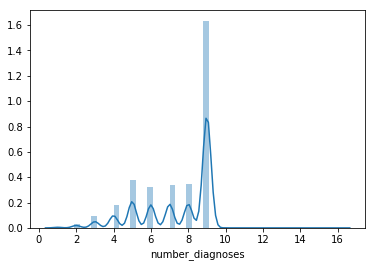

In [34]:
sns.distplot(filtereddata['number_diagnoses'])

In [35]:
np.var(filtereddata['number_diagnoses'],ddof=1)

3.750364900195231

In [36]:
q1=filtereddata['number_diagnoses'].quantile(.25)
q3=filtereddata['number_diagnoses'].quantile(.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
filtereddata[(filtereddata['number_diagnoses']>=lower) & (filtereddata['number_diagnoses']<=upper)].shape

(77031, 50)

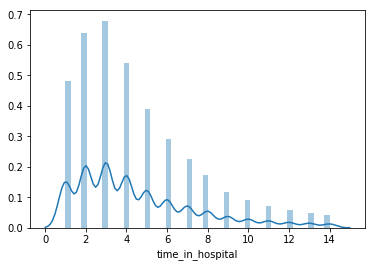

In [37]:
sns.distplot(filtereddata['time_in_hospital'])

In [38]:
np.var(filtereddata['time_in_hospital'],ddof=1)

8.960552537966436

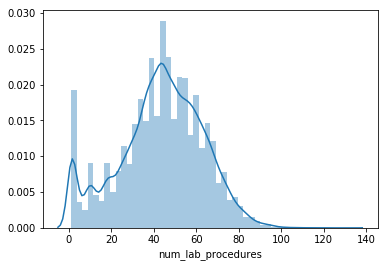

In [39]:
sns.distplot(filtereddata['num_lab_procedures'])

In [40]:
np.var(filtereddata['num_lab_procedures'],ddof=1)

391.1815762017714

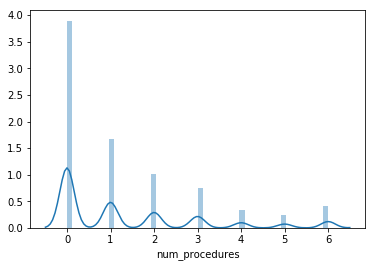

In [41]:
sns.distplot(filtereddata['num_procedures'])

In [42]:
np.var(filtereddata['num_procedures'],ddof=1)

2.91920813827761

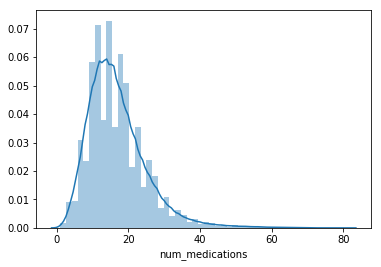

In [43]:
sns.distplot(filtereddata['num_medications'])

In [44]:
np.var(filtereddata['num_medications'],ddof=1)

67.44163564466996

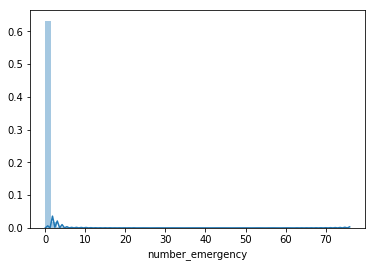

In [45]:
sns.distplot(filtereddata['number_emergency'])

In [46]:
np.var(filtereddata['number_emergency'],ddof=1)

0.952501834036541

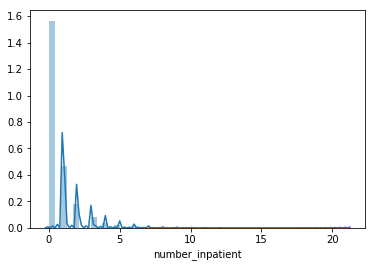

In [47]:
sns.distplot(filtereddata['number_inpatient'])

In [48]:
np.var(filtereddata['number_inpatient'],ddof=1)

1.6376700699547073

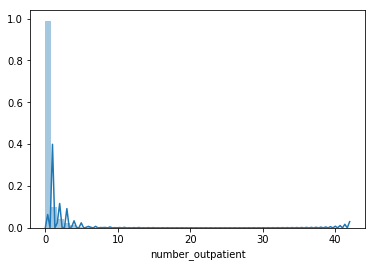

In [49]:
sns.distplot(filtereddata['number_outpatient'])

In [50]:
np.var(filtereddata['number_outpatient'],ddof=1)

1.6958110697810402

In [51]:
filtereddata['patient_nbr'].nunique()

55428

In [289]:
import scipy.stats.mstats as mstats

In [187]:
a=mstats.winsorize(a=filtereddata['number_diagnoses'],limits=[0.05,0.05]) # 90%

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


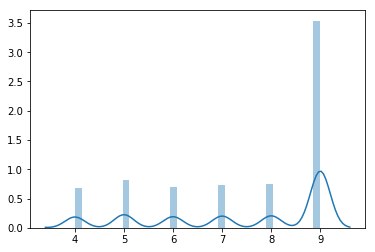

In [188]:
sns.distplot(a)

In [55]:
filtereddata['number_diagnoses'].unique()

array([ 9,  6,  7,  5,  8,  3,  4,  1,  2, 16, 13, 10, 12, 11, 14, 15],
      dtype=int64)

In [56]:
filtereddata['number_diagnoses'].value_counts()

9     37880
5      8769
8      8015
7      7843
6      7438
4      4141
3      2108
2       795
1       196
16       32
13       14
10       14
11       10
15        7
14        6
12        4
Name: number_diagnoses, dtype: int64

In [57]:
pd.Series(a).unique()

array([9, 6, 7, 5, 8, 4], dtype=int64)

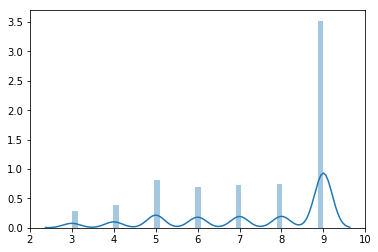

In [58]:
b=mstats.winsorize(a=filtereddata['number_diagnoses'],limits=[0.025,0.025]) # 95% 
sns.distplot(b)

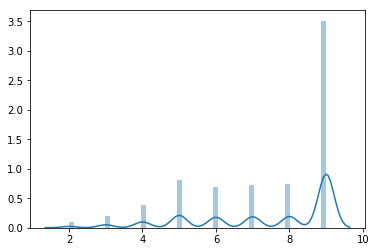

In [59]:
c=mstats.winsorize(a=filtereddata['number_diagnoses'],limits=[0.005,0.005]) # 99% 
sns.distplot(c)

In [60]:
pd.Series(b).unique()

array([9, 6, 7, 5, 8, 3, 4], dtype=int64)

In [61]:
pd.Series(c).unique()

array([9, 6, 7, 5, 8, 3, 4, 2], dtype=int64)

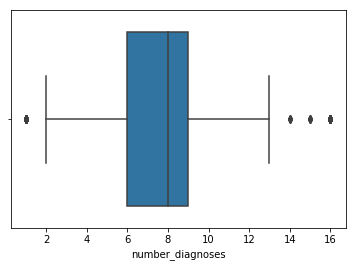

In [62]:
sns.boxplot(filtereddata['number_diagnoses'])

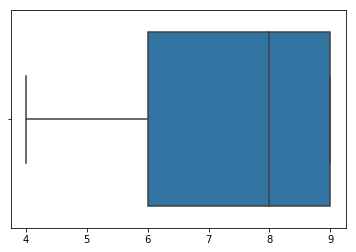

In [63]:
sns.boxplot(a) # 90%

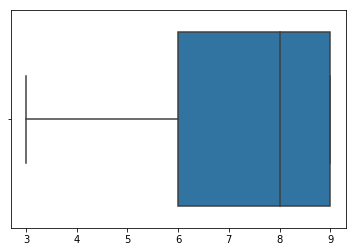

In [64]:
sns.boxplot(b) # 95%

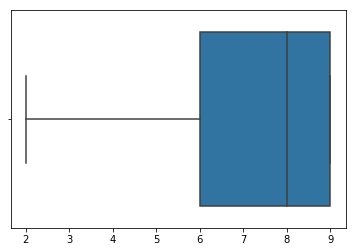

In [65]:
sns.boxplot(c) # 95%

#### Missing value treatment

In [189]:
filtereddata.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty', 'encounter_id',
       'race', 'gender', 'age', 'weight', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [290]:
filtereddata.shape

(77272, 50)

In [291]:
filtereddata.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
encounter_id                0
race                        0
gender                      0
age                         0
weight                      0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [292]:
filtereddata['patient_nbr'].nunique()

55428

In [293]:
filtereddata[filtereddata['diag_1']=='?'].shape

(15, 50)

In [294]:
filtereddata['diag_1'].replace({'?':'missing'},inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [295]:
filtereddata[filtereddata['diag_1']=='?'].shape

(0, 50)

In [296]:
filtereddata[filtereddata['diag_2']=='?'].shape

(301, 50)

In [297]:
filtereddata['diag_2'].replace({'?':'missing'},inplace=True)

In [298]:
filtereddata[filtereddata['diag_2']=='?'].shape

(0, 50)

In [299]:
filtereddata[filtereddata['diag_3']=='?'].shape

(1128, 50)

In [300]:
filtereddata['diag_3'].replace({'?':'missing'},inplace=True)

In [301]:
filtereddata[filtereddata['diag_3']=='?'].shape

(0, 50)

In [302]:
filtereddata['medical_specialty'].value_counts()

?                                       37430
InternalMedicine                        11195
Emergency/Trauma                         6177
Family/GeneralPractice                   5730
Cardiology                               3974
Surgery-General                          2254
Orthopedics                              1127
Nephrology                               1122
Orthopedics-Reconstructive                962
Radiologist                               883
Pulmonology                               687
Psychiatry                                662
Surgery-Cardiovascular/Thoracic           554
Urology                                   481
ObstetricsandGynecology                   439
Gastroenterology                          427
Surgery-Vascular                          415
Surgery-Neuro                             356
PhysicalMedicineandRehabilitation         309
Oncology                                  229
Pediatrics                                188
Neurology                         

In [303]:
filtereddata['medical_specialty'].replace({'?':'missing'},inplace=True) # as close to 50% data is missing, we cannot replace with mode
filtereddata['medical_specialty'].value_counts()

missing                                 37430
InternalMedicine                        11195
Emergency/Trauma                         6177
Family/GeneralPractice                   5730
Cardiology                               3974
Surgery-General                          2254
Orthopedics                              1127
Nephrology                               1122
Orthopedics-Reconstructive                962
Radiologist                               883
Pulmonology                               687
Psychiatry                                662
Surgery-Cardiovascular/Thoracic           554
Urology                                   481
ObstetricsandGynecology                   439
Gastroenterology                          427
Surgery-Vascular                          415
Surgery-Neuro                             356
PhysicalMedicineandRehabilitation         309
Oncology                                  229
Pediatrics                                188
Neurology                         

In [304]:
filtereddata['race'].value_counts()

Caucasian          57631
AfricanAmerican    14578
?                   1848
Hispanic            1543
Other               1202
Asian                470
Name: race, dtype: int64

In [305]:
filtereddata['race'].replace({'?':'Caucasian'},inplace=True) # replacing with mode-caucasian
filtereddata['race'].value_counts()

Caucasian          59479
AfricanAmerican    14578
Hispanic            1543
Other               1202
Asian                470
Name: race, dtype: int64

In [306]:
filtereddata['gender'].value_counts()

Female             41223
Male               36047
Unknown/Invalid        2
Name: gender, dtype: int64

In [307]:
filtereddata['gender'].replace({'Unknown/Invalid':'Female'},inplace=True)
# replacing Unknown/Invalid with mode - Female
filtereddata['gender'].value_counts()

Female    41225
Male      36047
Name: gender, dtype: int64

#### 24 drug columns have no null/missing values

#### Other columns have no nulls or missing vals

#### Columns having missing values or ? or unknowns are 

1. Race - 2273 missing vals have been replaced by mode - caucasian

2. Gender - 3 unknown vals were replaced with mode - Female

3. payer code - 40% vals are missing - no clear mode

4. medical speciality - 50% vals are missing - no clear mode

5. Weight - 97% vals are missing

6. diag1 - have been handled as a new category - missing

7. diag2 - have been handled as a new category - missing

8. diag3 - have been handled as a new category - missing

9. Examide - all values are NO

10. Citoglipton - all values are NO

### dropping unnecessary columns with high no. of missing vals or having no useful info

In [308]:
filtereddata.drop(['weight','payer_code','medical_specialty','examide','citoglipton'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [311]:
copymedyes = filtereddata.copy()

In [312]:
copymedyes.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [313]:
copymedyes.iloc[:,21:42]=copymedyes.iloc[:,21:42].replace(['No','Up','Down','Steady'],[0,1,1,1])

In [314]:
copymedyes.head()

,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,encounter_id,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,55629189,276,250.01,255,9,Emergency,ToHome,EmergencyRoom,3,149190,...,0,1,0,0,0,0,0,Ch,Yes,>30
2,86047875,648,250,V27,6,Emergency,ToHome,EmergencyRoom,2,64410,...,0,0,0,0,0,0,0,No,Yes,NO
3,82442376,8,250.43,403,7,Emergency,ToHome,EmergencyRoom,2,500364,...,0,1,0,0,0,0,0,Ch,Yes,NO
4,42519267,197,157,250,5,Emergency,ToHome,EmergencyRoom,1,16680,...,0,1,0,0,0,0,0,Ch,Yes,NO
5,82637451,414,411,250,9,Urgent,ToHome,ClinicReferral,3,35754,...,0,1,0,0,0,0,0,No,Yes,>30


In [315]:
# counting the total no. of drugs given to each diabetic patient
copymedyes['Total_drugs'] =copymedyes.iloc[:,21:42].sum(axis=1)
copymedyes.head(15)

,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,encounter_id,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Total_drugs
1,55629189,276,250.01,255,9,Emergency,ToHome,EmergencyRoom,3,149190,...,1,0,0,0,0,0,Ch,Yes,>30,1
2,86047875,648,250,V27,6,Emergency,ToHome,EmergencyRoom,2,64410,...,0,0,0,0,0,0,No,Yes,NO,1
3,82442376,8,250.43,403,7,Emergency,ToHome,EmergencyRoom,2,500364,...,1,0,0,0,0,0,Ch,Yes,NO,1
4,42519267,197,157,250,5,Emergency,ToHome,EmergencyRoom,1,16680,...,1,0,0,0,0,0,Ch,Yes,NO,2
5,82637451,414,411,250,9,Urgent,ToHome,ClinicReferral,3,35754,...,1,0,0,0,0,0,No,Yes,>30,1
6,84259809,414,411,V45,7,Elective,ToHome,ClinicReferral,4,55842,...,1,0,0,0,0,0,Ch,Yes,NO,3
7,114882984,428,492,250,8,Emergency,ToHome,EmergencyRoom,5,63768,...,0,0,0,0,0,0,No,Yes,>30,1
8,48330783,398,427,38,8,Urgent,ToHome,Transferfromahospital,13,12522,...,1,0,0,0,0,0,Ch,Yes,NO,2
9,63555939,434,198,486,8,Elective,ToSNF,Transferfromahospital,12,15738,...,1,0,0,0,0,0,Ch,Yes,NO,2
10,89869032,250.7,403,996,9,Emergency,ToHome,EmergencyRoom,9,28236,...,1,0,0,0,0,0,No,Yes,>30,1


In [316]:
copymedyes['Total_drugs'].value_counts()

1    46433
2    21714
3     7737
4     1325
5       58
6        5
Name: Total_drugs, dtype: int64

In [317]:
copymedyes.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Total_drugs'],
      dtype='object')

In [318]:
def soloinsulin(df):
    lst=[]
    for i in range(len(df)):
        if df.iloc[i,45] >=2:
            lst.append(0)
        else:
            if df.iloc[i,36] ==1:
                lst.append(1)
            else:
                lst.append(0)
    return lst
            

In [319]:
copymedyes['Solo_Insulin'] =soloinsulin(copymedyes)
copymedyes['Solo_Insulin'].value_counts()

0    47070
1    30202
Name: Solo_Insulin, dtype: int64

In [320]:
totaldrugs=copymedyes['Total_drugs']
soloinsulin=copymedyes['Solo_Insulin']

In [321]:
filtereddata['Total_drugs'] = totaldrugs
filtereddata['Solo_Insulin'] = soloinsulin
filtereddata.head(15)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,encounter_id,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Total_drugs,Solo_Insulin
1,55629189,276,250.01,255,9,Emergency,ToHome,EmergencyRoom,3,149190,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,86047875,648,250,V27,6,Emergency,ToHome,EmergencyRoom,2,64410,...,No,No,No,No,No,No,Yes,NO,1,0
3,82442376,8,250.43,403,7,Emergency,ToHome,EmergencyRoom,2,500364,...,No,No,No,No,No,Ch,Yes,NO,1,1
4,42519267,197,157,250,5,Emergency,ToHome,EmergencyRoom,1,16680,...,No,No,No,No,No,Ch,Yes,NO,2,0
5,82637451,414,411,250,9,Urgent,ToHome,ClinicReferral,3,35754,...,No,No,No,No,No,No,Yes,>30,1,1
6,84259809,414,411,V45,7,Elective,ToHome,ClinicReferral,4,55842,...,No,No,No,No,No,Ch,Yes,NO,3,0
7,114882984,428,492,250,8,Emergency,ToHome,EmergencyRoom,5,63768,...,No,No,No,No,No,No,Yes,>30,1,0
8,48330783,398,427,38,8,Urgent,ToHome,Transferfromahospital,13,12522,...,No,No,No,No,No,Ch,Yes,NO,2,0
9,63555939,434,198,486,8,Elective,ToSNF,Transferfromahospital,12,15738,...,No,No,No,No,No,Ch,Yes,NO,2,0
10,89869032,250.7,403,996,9,Emergency,ToHome,EmergencyRoom,9,28236,...,No,No,No,No,No,No,Yes,>30,1,1


In [322]:
filtereddata['Total_drugs'].value_counts()

1    46433
2    21714
3     7737
4     1325
5       58
6        5
Name: Total_drugs, dtype: int64

In [323]:
filtereddata['Solo_Insulin'].value_counts()

0    47070
1    30202
Name: Solo_Insulin, dtype: int64

In [324]:
filtereddata.to_csv('FilteredData.csv',index=0)

In [326]:
filtereddata['A1Cresult'].value_counts()

None    63155
>8       7362
Norm     3702
>7       3053
Name: A1Cresult, dtype: int64

In [327]:
filtereddata['max_glu_serum'].value_counts()

None    73421
Norm     1674
>200     1176
>300     1001
Name: max_glu_serum, dtype: int64

### dropping A1Cresult and max_glu_serum cols because they have 81% and 95% data as None

In [328]:
filtereddata.shape

(77272, 47)

In [329]:
filtereddata.drop(['A1Cresult','max_glu_serum'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [330]:
filtereddata.shape

(77272, 45)

In [332]:
filtereddata.to_csv('FilteredData.csv',index=0)

In [333]:
filtereddata.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [336]:
filtereddata['admission_source_id'].value_counts()

EmergencyRoom                                        43498
PhysicianReferral                                    22654
NULL                                                  5142
Transferfromahospital                                 2430
Transferfromanotherhealthcarefacility                 1769
ClinicReferral                                         832
 TransferfromaSkilledNursingFacility(SNF)              529
NotMapped                                              139
HMOReferral                                            128
NotAvailable                                           111
Court/LawEnforcement                                    14
Transferfromhospitalinpt/samefacresultinasepclaim       12
Transferfromcritialaccesshospital                        8
TransferfromAmbulatorySurgeryCenter                      2
NormalDelivery                                           2
ExtramuralBirth                                          1
SickBaby                                                

In [337]:
filtereddata['admission_source_id'].replace({'NULL':'NA','NotMapped':'NA','NotAvailable':'NA','PhysicianReferral':'Referral',
                                      'ClinicReferral':'Referral','HMOReferral':'Referral','Transferfromahospital':'Transfer'
                                     ,'Transferfromanotherhealthcarefacility':'Transfer',
                                      ' TransferfromaSkilledNursingFacility(SNF)':'Transfer',
                                      'Transferfromhospitalinpt/samefacresultinasepclaim':'Transfer',
                                     'Transferfromcritialaccesshospital':'Transfer',
                                             'TransferfromAmbulatorySurgeryCenter':'Transfer'
                                     },inplace=True)
filtereddata['admission_source_id'].replace({'Court/LawEnforcement':'Misc',
                                             'NormalDelivery':'Misc','ExtramuralBirth':'Misc',
                                     'SickBaby':'Misc'},inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [338]:
filtereddata.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [340]:
filtereddata['admission_source_id'].value_counts()

EmergencyRoom    43498
Referral         23614
NA                5392
Transfer          4750
Misc                18
Name: admission_source_id, dtype: int64

In [342]:
filtereddata['admission_type_id'].value_counts()

Emergency        40547
Elective         14509
Urgent           14351
NA                3817
NULL              3756
Not Mapped         272
Trauma Center       12
Newborn              8
Name: admission_type_id, dtype: int64

In [344]:
filtereddata['discharge_disposition_id'].value_counts()

ToHome                                                  46538
ToSNF                                                   11025
ToHomeWithHomeHealthCare                                10292
NULL                                                     2283
ToRehab                                                  1643
ToShortTermHosp                                          1543
ToInpatientCareInst                                       890
Not_Mapped                                                767
ToICF                                                     601
LeftAMA                                                   452
ToLongTermCare                                            351
Hospice/Home                                              288
Hospice/Med.Facility                                      265
ToPsychiatricHosp.                                        113
ToHomeIVProvider                                           80
MedicareApprovedSwingBed                                   55
ToNursin

In [345]:
filtereddata['discharge_disposition_id'].replace(['ToShortTermHosp','ToSNF','ToICF','ToInpatientCareInst',
                                          'InpatientInSameHosp','AnotherHospNeonatalCare','StillPatientOROutpatient',
                                          'Hospice/Home','Hospice/Med.Facility','MedicareApprovedSwingBed',
                                   'AnotherInst.Outpatient','SameInst.Outpatient','ToRehab','ToLongTermCare',
                                          'ToNursingFac(MedicaidCertified,MedicareNotCertified)','ToFederalHealthCareFac.',
                                          'ToPsychiatricHosp.','ToCAHosp','ToUnknownHCHosp.'],
                                         ['To_further_treatment','To_further_treatment','To_further_treatment',
                                          'To_further_treatment','To_further_treatment','To_further_treatment',
                                          'To_further_treatment','To_further_treatment','To_further_treatment',
                                          'To_further_treatment','To_further_treatment','To_further_treatment',
                                          'To_further_treatment','To_further_treatment','To_further_treatment',
                                          'To_further_treatment','To_further_treatment','To_further_treatment','To_further_treatment'],inplace=True)
filtereddata['discharge_disposition_id'].replace(['NULL','Not_Mapped'],['NA','NA'],inplace=True)
filtereddata['discharge_disposition_id'].replace(['ToHomeWithHomeHealthCare','ToHomeIVProvider'],['ToHome','ToHome'],inplace=True)
filtereddata['discharge_disposition_id'].replace(['ExpiredAtHome.MedicaidOnly','ExpiredInMedFacility.MedicaidOnly'],['Expired','Expired'],inplace=True)
filtereddata['discharge_disposition_id'].value_counts()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


ToHome                  56910
To_further_treatment    16860
NA                       3050
LeftAMA                   452
Name: discharge_disposition_id, dtype: int64

In [347]:
filtereddata.to_csv('FilteredData_Updated.csv',index=0)

In [348]:
filtereddata.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Total_drugs', 'Solo_Insulin'],
      dtype='object')

In [236]:
filtereddata[filtereddata['discharge_disposition_id']=='To_further_treatment']

,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,encounter_id,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Total_drugs,Solo_Insulin
9,63555939,434,198,486,8,Elective,To_further_treatment,Transfer,12,15738,...,No,No,No,No,No,Ch,Yes,NO,2,0
12,85504905,428,250.43,250.6,8,Emergency,To_further_treatment,EmergencyRoom,7,40926,...,No,No,No,No,No,Ch,Yes,<30,3,0
15,86328819,999,507,996,9,Emergency,To_further_treatment,EmergencyRoom,12,73578,...,No,No,No,No,No,Ch,Yes,NO,1,1
26,40523301,427,428,414,7,Emergency,To_further_treatment,EmergencyRoom,6,236316,...,No,No,No,No,No,Ch,Yes,NO,2,0
29,18196434,428,410,414,8,Emergency,To_further_treatment,EmergencyRoom,5,252822,...,No,No,No,No,No,Ch,Yes,>30,2,0
31,96664626,462,250.01,276,8,Emergency,To_further_treatment,EmergencyRoom,1,253722,...,No,No,No,No,No,Ch,Yes,>30,1,1
40,80588529,414,411,250.01,4,Emergency,To_further_treatment,EmergencyRoom,1,383430,...,No,No,No,No,No,Ch,Yes,>30,2,0
46,86240259,428,427,250.01,7,Elective,To_further_treatment,Transfer,9,486156,...,No,No,No,No,No,Ch,Yes,<30,2,0
47,51838164,295,599,250,3,Elective,To_further_treatment,Transfer,9,498030,...,No,No,No,No,No,Ch,Yes,NO,2,0
61,94994802,414,411,428,8,Emergency,To_further_treatment,EmergencyRoom,4,679722,...,No,No,No,No,No,Ch,Yes,>30,2,0


In [349]:
filtereddata['discharge_disposition_id'].value_counts()

ToHome                  56910
To_further_treatment    16860
NA                       3050
LeftAMA                   452
Name: discharge_disposition_id, dtype: int64

In [248]:
#filtereddata=pd.read_csv('FilteredData_Updated.csv')

In [353]:
filtereddata.to_csv('FilteredData_Updated.csv',index=0)

In [241]:
filtereddata['diabetesMed'].value_counts()

Yes    77272
Name: diabetesMed, dtype: int64

In [242]:
filtereddata.shape

(77272, 45)

### dropping all drugs as we have captured their data in total_drugs and solo_insulin
### dropping diabetesMed as all values are 'Yes'

In [355]:
filtereddata.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','diabetesMed'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [356]:
filtereddata.shape

(77272, 23)

In [357]:
filtereddata.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
dtype: int64

### Outliers

In [358]:
outlierdt=pd.DataFrame({"Features":['number_diagnoses','time_in_hospital','num_lab_procedures', 'num_procedures',
                                    'num_medications','number_outpatient', 'number_inpatient','number_emergency'], 
                        'No_of_Ouliers':[241,1799,152,3797,2035,13037,5490,9124], 
                       'Percentage_of_Outliers':[0.31,2.32,0.19,4.91,2.63,16.87,7.10,11.80]})

In [359]:
outlierdt

,Features,No_of_Ouliers,Percentage_of_Outliers
0,number_diagnoses,241,0.31
1,time_in_hospital,1799,2.32
2,num_lab_procedures,152,0.19
3,num_procedures,3797,4.91
4,num_medications,2035,2.63
5,number_outpatient,13037,16.87
6,number_inpatient,5490,7.10
7,number_emergency,9124,11.80


In [360]:
import scipy.stats.mstats as mstats

In [361]:
b=mstats.winsorize(a=filtereddata['number_diagnoses'],limits=[0.025,0.025]) # 95%
c=mstats.winsorize(a=filtereddata['time_in_hospital'],limits=[0.025,0.025]) # 95% 
d=mstats.winsorize(a=filtereddata['num_lab_procedures'],limits=[0.025,0.025]) # 95% 
e=mstats.winsorize(a=filtereddata['num_procedures'],limits=[0.025,0.025]) # 95% 
f=mstats.winsorize(a=filtereddata['num_medications'],limits=[0.025,0.025]) # 95% 
g=mstats.winsorize(a=filtereddata['number_inpatient'],limits=[0.025,0.025]) # 95% 

In [431]:
after_win = filtereddata.copy()

In [432]:
after_win.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
dtype: int64

In [433]:
after_win['number_diagnoses']=b
after_win['time_in_hospital']=c
after_win['num_lab_procedures']=d
after_win['num_procedures']=e
after_win['num_medications']=f
after_win['number_inpatient']=g

In [365]:
after_win.to_csv('AfterWinsorization.csv',index=0)

In [366]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [367]:
X = after_win.drop(['Solo_Insulin','diag_1','diag_2','diag_3','patient_nbr','encounter_id'], axis=1)
y = after_win['Solo_Insulin']
X.shape

(77272, 17)

In [368]:
X=pd.get_dummies(X)
X.shape

(77272, 48)

In [369]:
# DT
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2,stratify=y)
model = DecisionTreeClassifier(random_state=0,max_depth=3,max_leaf_nodes=15,min_samples_leaf=15)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(metrics.cohen_kappa_score(y_test,y_predict))
print(metrics.f1_score(y_test, y_predict))

0.8062762859915885
0.6179210906624562
0.7901303799242955


### Baseline Model - Log Reg

In [370]:
X = after_win.drop(['Solo_Insulin','diag_1','diag_2','diag_3'], axis=1)
y = after_win['Solo_Insulin']
X=pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2,stratify=y)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
aucmetric=metrics.auc(fpr,tpr)
print(accuracy_score(y_test, y_predict))
print(aucmetric)
print(metrics.cohen_kappa_score(y_test,y_predict))
print(metrics.f1_score(y_test,y_predict))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.61      1.00      0.76      9414
           1       0.00      0.00      0.00      6041

   micro avg       0.61      0.61      0.61     15455
   macro avg       0.30      0.50      0.38     15455
weighted avg       0.37      0.61      0.46     15455

0.6091232610805565
0.5
0.0
0.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [371]:
X = after_win.drop(['Solo_Insulin','diag_1','diag_2','diag_3','patient_nbr','encounter_id'], axis=1) # dropping patient nbr and encounter id
y = after_win['Solo_Insulin']
X=pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2,stratify=y)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
aucmetric=metrics.auc(fpr,tpr)
print(accuracy_score(y_test, y_predict))
print(aucmetric)
print(metrics.cohen_kappa_score(y_test,y_predict))
print(metrics.f1_score(y_test,y_predict))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9414
           1       0.77      0.80      0.79      6041

   micro avg       0.83      0.83      0.83     15455
   macro avg       0.82      0.83      0.82     15455
weighted avg       0.83      0.83      0.83     15455

0.8302167583306373
0.8256990762823279
0.646261896575895
0.7875303643724696


In [495]:
insulin=pd.read_csv('FilteredData_Updated.csv')

In [496]:
insulin = insulin['insulin']
insulin.head()

0        Up
1        No
2        Up
3    Steady
4    Steady
Name: insulin, dtype: object

In [497]:
insulin.isnull().sum()

0

In [498]:
insulin.shape

(77272,)

In [499]:
insulin.value_counts()

Steady    30331
No        23838
Down      12012
Up        11091
Name: insulin, dtype: int64

In [500]:
after_win.index=np.arange(len(after_win))

In [501]:
after_win['insulin'] = insulin
after_win.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'change',
       'readmitted', 'Total_drugs', 'Solo_Insulin', 'insulin'],
      dtype='object')

In [502]:
after_win.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
insulin                     0
dtype: int64

In [503]:
after_win.shape

(77272, 24)

In [504]:
after_win['insulin']=after_win['insulin'].replace(['No','Up','Down','Steady'],[0,1,1,1])

In [505]:
after_win.shape

(77272, 24)

In [506]:
after_win.isnull().sum()

patient_nbr                 0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
insulin                     0
dtype: int64

total_drugs -> 21 , insulin -> 23

In [507]:
def eff(df):
    lst=[]
    for i in range(len(df)):
        if (df.iloc[i,21] == 1) and (df.iloc[i,23] == 1):
            lst.append('I')
        elif (df.iloc[i,21] > 1) and (df.iloc[i,23] == 1):
            lst.append('IO')
        elif (df.iloc[i,21] > 0) and (df.iloc[i,23] == 0):
            lst.append('O')
            
    return lst
            

In [508]:
efficiency = pd.DataFrame()

In [509]:
efficiency['I/IO/O'] = eff(after_win)

In [510]:
efficiency.shape

(77272, 1)

In [511]:
efficiency['I/IO/O'].value_counts()

I     30202
O     23838
IO    23232
Name: I/IO/O, dtype: int64

In [512]:
efficiency.shape

(77272, 1)

In [513]:
efficiency['Readmitted']=after_win['readmitted']

In [473]:
i = efficiency[efficiency['I/IO/O']=='I']

### Solo Insulin Efficiency

In [474]:
i['Readmitted'].value_counts()

NO     14972
>30    11230
<30     4000
Name: Readmitted, dtype: int64

In [475]:

print('Efficiency of SoloInsulin is {}'.format(round(i['Readmitted'].value_counts()['NO']/len(i),3)))

Efficiency of SoloInsulin is 0.496


### Solo Insulin + Other Drugs (I+O) efficiency

In [476]:
io = efficiency[efficiency['I/IO/O']=='IO']
io['Readmitted'].value_counts()

NO     12265
>30     8366
<30     2601
Name: Readmitted, dtype: int64

In [477]:
print('Efficiency of Insulin + OtherDrugs(solo + combination) is {}'.format(round(io['Readmitted'].value_counts()['NO']/len(io),3)))

Efficiency of Insulin + OtherDrugs(solo + combination) is 0.528


### Other (individual drug and combinations) Drugs Efficiency

In [478]:
o = efficiency[efficiency['I/IO/O']=='O']
o['Readmitted'].value_counts()

NO     12606
>30     8722
<30     2510
Name: Readmitted, dtype: int64

In [479]:
print('Efficiency of Other drugs (solo + combination) is {}'.format(round(o['Readmitted'].value_counts()['NO']/len(o),3)))

Efficiency of Other drugs (solo + combination) is 0.529


### Solo Other Drugs Efficiency i.e. total drugs ==1 and insulin ==0

In [480]:
z=after_win[after_win['insulin']==0]

In [481]:
z['Total_drugs'].value_counts()

1    16231
2     6417
3     1150
4       38
6        1
5        1
Name: Total_drugs, dtype: int64

In [482]:
print('Efficiency of Solo Other Drugs is {}'.format(round(z['Total_drugs'].value_counts()[1]/len(z),3)))

Efficiency of Solo Other Drugs is 0.681


### SoloInsulin + Others(Drug) Efficiency

In [516]:
after_win['Total_drugs'].value_counts()

1    46433
2    21714
3     7737
4     1325
5       58
6        5
Name: Total_drugs, dtype: int64

In [517]:
print('Efficiency of SoloInsulin + Other Solo Drug is {}'.format(round(after_win['Total_drugs'].value_counts()[1]/len(after_win),3)))

Efficiency of SoloInsulin + Other Solo Drug is 0.601


In [518]:
pd.DataFrame(index=['SoloInsulin','SoloInsulin+Others(Drug+Combination)','Others(Drug+Combination)','Others(Drug)','SoloInsulin+Others(Drug)']
             ,data=['49.6%','52.8%',
              '52.9%','68.1%','60.1%'],columns=['Efficiency'])

,Efficiency
SoloInsulin,49.6%
SoloInsulin+Others(Drug+Combination),52.8%
Others(Drug+Combination),52.9%
Others(Drug),68.1%
SoloInsulin+Others(Drug),60.1%


In [520]:
#efficiency.to_csv('efficiency.csv',index=0)

In [484]:
after_win['admission_type_id'].value_counts()

Emergency        40547
Elective         14509
Urgent           14351
NA                3817
NULL              3756
Not Mapped         272
Trauma Center       12
Newborn              8
Name: admission_type_id, dtype: int64

In [486]:
after_win['admission_type_id'].replace({'NULL':'NA','Not Mapped':'NA'},inplace=True)

In [487]:
after_win['admission_type_id'].value_counts()

Emergency        40547
Elective         14509
Urgent           14351
NA                7845
Trauma Center       12
Newborn              8
Name: admission_type_id, dtype: int64

In [488]:
after_win.to_csv('AfterWinsorization.csv',index=0)

In [490]:
after_win.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'change',
       'readmitted', 'Total_drugs', 'Solo_Insulin', 'insulin'],
      dtype='object')

In [492]:
after_win.drop('insulin',axis=1,inplace=True)

In [493]:
after_win.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'change',
       'readmitted', 'Total_drugs', 'Solo_Insulin'],
      dtype='object')

In [522]:
after_win.drop('insulin',axis=1,inplace=True)

### Feature Engineering diag1, diag2, diag3 based on icd9 codes to get a new column - diagnosis 

In [523]:
after_win.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'change',
       'readmitted', 'Total_drugs', 'Solo_Insulin'],
      dtype='object')

##### if diag1,2,3 start with 250 then diabetic according to icd9 codes

In [529]:
def diagnosis(df):
    lst=[]
    for i in range(len(df)):
        if(( df.iloc[i,1].startswith('250') == True) or ( df.iloc[i,2].startswith('250') == True) or ( df.iloc[i,3].startswith('250') == True)):
            lst.append(1)
        else:
            lst.append(0)
    return lst

In [530]:
temp1=after_win.copy()
temp2=after_win.copy()

In [531]:
temp1['diagnosis']=diagnosis(temp1)

In [532]:
temp1['diagnosis'].value_counts()

0    46964
1    30308
Name: diagnosis, dtype: int64

In [539]:
temp1.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [533]:
fe=pd.read_csv('FeatureEngineering.csv')

In [534]:
fe.columns

Index(['patient_nbr', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'encounter_id', 'race', 'gender', 'age',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Total_drugs', 'Solo_Insulin', 'circulatory', 'respiratory',
       'digestive', 'diabetes', 'injury', 'musculusketal', 'genitourinary',
       'neoplasms', 'others'],
      dtype='object')

In [537]:
temp2['circulatory']=fe['circulatory']
temp2['respiratory']=fe['respiratory']
temp2['digestive']=fe['digestive']
temp2['diabetic']=fe['diabetes']
temp2['injury']=fe['injury']
temp2['musculusketal']=fe['musculusketal']
temp2['genitourinary']=fe['genitourinary']
temp2['neoplasms']=fe['neoplasms']

In [540]:
temp2.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [542]:
temp2.columns

Index(['patient_nbr', 'number_diagnoses', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'encounter_id', 'race', 'gender', 'age', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'change', 'readmitted',
       'Total_drugs', 'Solo_Insulin', 'circulatory', 'respiratory',
       'digestive', 'diabetic', 'injury', 'musculusketal', 'genitourinary',
       'neoplasms'],
      dtype='object')

### testing baseline with new columns

In [551]:
x=temp1.drop(['patient_nbr','encounter_id','Solo_Insulin'],axis=1)
y=temp1['Solo_Insulin']

In [552]:
x = pd.get_dummies(x,drop_first=True)

In [546]:
# WITH TEMP1
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.2,stratify=y)
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
aucmetric=metrics.auc(fpr,tpr)
print(accuracy_score(y_test, y_predict))
print(aucmetric)
print(metrics.cohen_kappa_score(y_test,y_predict))
print(metrics.f1_score(y_test,y_predict))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.84      0.86      9414
           1       0.77      0.80      0.79      6041

   micro avg       0.83      0.83      0.83     15455
   macro avg       0.82      0.82      0.82     15455
weighted avg       0.83      0.83      0.83     15455

0.8285991588482692
0.8242823005334942
0.6430911936664504
0.7858355566335193


In [553]:
x.shape

(77272, 39)

In [547]:
x=temp2.drop(['patient_nbr','encounter_id','Solo_Insulin'],axis=1)
y=temp2['Solo_Insulin']

In [548]:
x = pd.get_dummies(x,drop_first=True)

In [549]:
# WITH TEMP2
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.2,stratify=y)
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(metrics.classification_report(y_test, y_predict))
fpr,tpr,_ =metrics.roc_curve(y_test, y_predict)
aucmetric=metrics.auc(fpr,tpr)
print(accuracy_score(y_test, y_predict))
print(aucmetric)
print(metrics.cohen_kappa_score(y_test,y_predict))
print(metrics.f1_score(y_test,y_predict))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.85      0.87      9414
           1       0.78      0.81      0.80      6041

   micro avg       0.84      0.84      0.84     15455
   macro avg       0.83      0.83      0.83     15455
weighted avg       0.84      0.84      0.84     15455

0.8377871239081204
0.8330994401368989
0.6616662087081693
0.7963940550637537


In [550]:
x.shape

(77272, 46)

In [557]:
temp2.isnull().sum()

patient_nbr                 0
number_diagnoses            0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
encounter_id                0
race                        0
gender                      0
age                         0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
change                      0
readmitted                  0
Total_drugs                 0
Solo_Insulin                0
circulatory                 0
respiratory                 0
digestive                   0
diabetic                    0
injury                      0
musculusketal               0
genitourinary               0
neoplasms                   0
dtype: int64

In [559]:
temp1.to_csv('temp1.csv',index=0)
temp2.to_csv('temp2.csv',index=0)